In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR
import random 

path = r'C:\Users\Sebas!\Documents\GitHub\Project4\Datasets\Cleaned datasets'
datavizfolder = r'C:\Users\Sebas!\Documents\GitHub\Project4\Project-4\DataViz'

In [2]:
csvfiles = {}
for n in range(1,13): #loop to gather all the datasets in one variable
    if n < 10:
        file = pd.read_csv(fr'{path}\movements_0{n}-2020.csv',index_col=False)
        csvfiles[f'movements_0{n}-2020'] = file
    elif n >= 10:
        file = pd.read_csv(fr'{path}\movements_{n}-2020.csv',index_col=False)
        csvfiles[f'movements_{n}-2020'] = file
for n in range(1,3):
    file = pd.read_csv(fr'{path}\movements_0{n}-2021.csv',index_col=False)
    csvfiles[f'movements_0{n}-2021'] = file

for key in csvfiles.keys(): #added date format and deleted the Unnamed:0 column
    csvfiles[key]['Data lanc'] = pd.to_datetime(csvfiles[key]['Data lanc'])
    csvfiles[key]['Data valor'] = pd.to_datetime(csvfiles[key]['Data valor'])

In [3]:
csvfiles.keys()


dict_keys(['movements_01-2020', 'movements_02-2020', 'movements_03-2020', 'movements_04-2020', 'movements_05-2020', 'movements_06-2020', 'movements_07-2020', 'movements_08-2020', 'movements_09-2020', 'movements_10-2020', 'movements_11-2020', 'movements_12-2020', 'movements_01-2021', 'movements_02-2021'])

In [4]:
for key in csvfiles.keys():
    display(csvfiles[key])
    print(csvfiles[key].dtypes, '\n')

,Unnamed: 0,Data lanc,Data valor,Descritivo,Debito,Credito,Saldo
0,0,2020-01-02,2020-01-02,COMPRA MOSCAVIDE LISBOA,40.00,NaN,3999.70
1,1,2020-01-02,2020-01-02,COMPRA ZHOU E PAN LDA LISBOA,16.00,NaN,3983.70
2,2,2020-01-02,2020-01-02,DEVOL. ZHOU E PAN LDA LISBOA,NaN,16.00,3999.70
3,3,2020-01-02,2020-01-02,COMPRA ZHOU E PAN LDA LISBOA,16.00,NaN,3983.70
4,4,2020-01-02,2020-01-02,COMPRA PAD PORT TELHEIR LIS CONTACTLESS,3.05,NaN,3980.65
5,5,2020-01-02,2020-01-02,PAG WTF,12.00,NaN,3968.65
6,6,2020-01-03,2020-01-03,COMPRA BOLT.EU O Tallinn EE,5.20,NaN,3963.45
7,7,2020-01-07,2020-01-07,COMPRA PAYPAL SPOTIFY GB,6.99,NaN,3956.46
8,8,2020-01-07,2020-01-07,COMPRA UBER JUMP HELP.UBER.COM Amsterdam P,1.80,NaN,3954.66
9,9,2020-01-07,2020-01-07,COMPRA UBER JUMP HELP.UBER.COM Amsterdam P,1.80,NaN,3952.86


Unnamed: 0             int64
Data lanc     datetime64[ns]
Data valor    datetime64[ns]
Descritivo            object
Debito               float64
Credito              float64
Saldo                float64
dtype: object 



,Unnamed: 0,Data lanc,Data valor,Descritivo,Debito,Credito,Saldo
0,0,2020-02-03,2020-02-03,COMPRA AREEIRO LISBOA,40.00,NaN,4540.84
1,1,2020-02-03,2020-02-03,PAG WTF,12.00,NaN,4528.84
2,2,2020-02-03,2020-02-03,COMPRA UBER JUMP HELP.UBER.COM Amsterdam P,2.40,NaN,4526.44
3,3,2020-02-03,2020-02-03,COMPRA CONTINENTE L I S B O A CONTACTLESS,10.06,NaN,4516.38
4,4,2020-02-04,2020-02-04,COMPRA RIDEHIVE.COM LISBOA PT,1.60,NaN,4514.78
5,5,2020-02-04,2020-02-04,COMPRA MANPOWER LISBOA,1.90,NaN,4512.88
6,6,2020-02-05,2020-02-05,COMPRA PAYPAL SPOTIFY GB,6.99,NaN,4505.89
7,7,2020-02-05,2020-02-05,COMPRA UBER JUMP HELP.UBER.COM Amsterdam P,1.40,NaN,4504.49
8,8,2020-02-05,2020-02-05,COMPRA UBER JUMP HELP.UBER.COM Amsterdam P,1.20,NaN,4503.29
9,9,2020-02-06,2020-02-06,COMPRA MANPOWER LISBOA,1.80,NaN,4501.49


Unnamed: 0             int64
Data lanc     datetime64[ns]
Data valor    datetime64[ns]
Descritivo            object
Debito               float64
Credito              float64
Saldo                float64
dtype: object 



,Unnamed: 0,Data lanc,Data valor,Descritivo,Debito,Credito,Saldo
0,0,2020-03-02,2020-03-02,COMPRA SALDANHA LISBOA,40.00,NaN,4953.78
1,1,2020-03-02,2020-03-02,COMPRA QUIOSQUE SALDANHA LISBO CONTACTLESS,1.10,NaN,4952.68
2,2,2020-03-03,2020-03-03,PAG WTF,12.00,NaN,4940.68
3,3,2020-03-03,2020-03-03,COMPRA DECATHLON LISBOA - LISBOA,60.76,NaN,4879.92
4,4,2020-03-05,2020-03-05,COMPRA PAYPAL SPOTIFY GB,6.99,NaN,4872.93
5,5,2020-03-06,2020-03-06,COMPRA GLOVOAPP SL SUCURSAL Lisbon PT,7.99,NaN,4864.94
6,6,2020-03-09,2020-03-09,TRF MB WAY P/ *****,11.00,NaN,4853.94
7,7,2020-03-09,2020-03-08,TRF P/,200.00,NaN,4653.94
8,8,2020-03-09,2020-03-09,COMPRA FNAC SALDANHA LISBOA,39.99,NaN,4613.95
9,9,2020-03-12,2020-03-12,COMPRA BOLT.EU O Tallinn EE,12.76,NaN,4601.19


Unnamed: 0             int64
Data lanc     datetime64[ns]
Data valor    datetime64[ns]
Descritivo            object
Debito               float64
Credito              float64
Saldo                float64
dtype: object 



,Unnamed: 0,Data lanc,Data valor,Descritivo,Debito,Credito,Saldo
0,0,2020-04-02,2020-04-02,COMPRA Uber BV UBER EATS HELP.UBVorden PT,9.40,NaN,5460.40
1,1,2020-04-06,2020-04-05,TRF P/,200.00,NaN,5260.40
2,2,2020-04-06,2020-04-06,PAG WTF,12.00,NaN,5248.40
3,3,2020-04-07,2020-04-07,COMPRA PAYPAL SPOTIFY GB,6.99,NaN,5241.41
4,4,2020-04-07,2020-04-07,COMPRA Uber BV UBER EATS HELP.UBVorden PT,7.10,NaN,5234.31
5,5,2020-04-07,2020-04-07,COMPRA Uber BV UBER EATS HELP.UBVorden PT,0.50,NaN,5233.81
6,6,2020-04-14,2020-04-14,COMPRA Uber BV UBER EATS HELP.UBVorden PT,11.70,NaN,5222.11
7,7,2020-04-16,2020-04-16,TRANSFERENCIA - VENCIMENTO,NaN,178.00,5400.11
8,8,2020-04-21,2020-04-21,COMPRA Uber BV UBER EATS HELP.UBVorden PT,11.70,NaN,5388.41
9,9,2020-04-22,2020-04-22,COMPRA PINGO DOCE BELA VISTLISBOA,30.41,NaN,5358.00


Unnamed: 0             int64
Data lanc     datetime64[ns]
Data valor    datetime64[ns]
Descritivo            object
Debito               float64
Credito              float64
Saldo                float64
dtype: object 



,Unnamed: 0,Data lanc,Data valor,Descritivo,Debito,Credito,Saldo
0,0,2020-05-04,2020-05-04,COMPRA PAYPAL STEAM GAMES GB,12.49,NaN,6045.29
1,1,2020-05-04,2020-05-04,COMPRA Uber BV UBER EATS HELP.UBVorden PT,12.30,NaN,6032.99
2,2,2020-05-04,2020-05-04,COMPRA Uber BV UBER EATS HELP.UBVorden PT,0.50,NaN,6032.49
3,3,2020-05-04,2020-05-04,COMPRA PAYPAL SPOTIFY GB,6.99,NaN,6025.50
4,4,2020-05-08,2020-05-08,TRF P/,200.00,NaN,5825.50
5,5,2020-05-08,2020-05-08,PAG WTF,12.00,NaN,5813.50
6,6,2020-05-11,2020-05-11,COMPRA Uber BV UBER EATS HELP.UBVorden PT,13.45,NaN,5800.05
7,7,2020-05-11,2020-05-11,COMPRA AMZN Mktp ES FHFY --,192.49,NaN,5607.56
8,8,2020-05-13,2020-05-13,COMPRA PAYPAL INSTANTGAMI HK,4.11,NaN,5603.45
9,9,2020-05-13,2020-05-13,CUSTO DE SERVICO INTERNACIONAL,0.12,NaN,5603.33


Unnamed: 0             int64
Data lanc     datetime64[ns]
Data valor    datetime64[ns]
Descritivo            object
Debito               float64
Credito              float64
Saldo                float64
dtype: object 



,Unnamed: 0,Data lanc,Data valor,Descritivo,Debito,Credito,Saldo
0,0,2020-06-01,2020-06-01,COMPRA LUMIAR LISBOA,1.50,NaN,5980.06
1,1,2020-06-01,2020-06-01,COMPRA OLAIAS LISBOA,9.00,NaN,5971.06
2,2,2020-06-02,2020-06-02,TRF P/ BERENS ESTATE MANAGEMENT,350.00,NaN,5621.06
3,3,2020-06-02,2020-06-02,COMPRA DAUFOOD PORTUGAL Lisbon PT,7.00,NaN,5614.06
4,4,2020-06-02,2020-06-02,COMPRA Uber BV UBER EATS HELP.UBVorden PT,11.90,NaN,5602.16
5,5,2020-06-03,2020-06-03,PAG WTF,12.00,NaN,5590.16
6,6,2020-06-03,2020-06-03,COMPRA NOTE MORAIS SOARES LISB CONTACTLESS,2.08,NaN,5588.08
7,7,2020-06-03,2020-06-03,COMPRA ISABEL FERREIRA - LISBOA,55.35,NaN,5532.73
8,8,2020-06-03,2020-06-03,COMPRA HUANG QIMENG LISBOA,9.50,NaN,5523.23
9,9,2020-06-05,2020-06-05,COMPRA PAYPAL SPOTIFY GB,6.99,NaN,5516.24


Unnamed: 0             int64
Data lanc     datetime64[ns]
Data valor    datetime64[ns]
Descritivo            object
Debito               float64
Credito              float64
Saldo                float64
dtype: object 



,Unnamed: 0,Data lanc,Data valor,Descritivo,Debito,Credito,Saldo
0,0,2020-07-01,2020-07-01,COMPRA CONTINENTE BOM DIA LISB CONTACTLESS,9.36,NaN,6485.32
1,1,2020-07-01,2020-07-01,PAG WTF,12.00,NaN,6473.32
2,2,2020-07-02,2020-07-02,COMPRA SORTE ALAMEDA - LISBOA,9.35,NaN,6463.97
3,3,2020-07-06,2020-07-06,COMPRA ALAMEDA LISBOA,6.00,NaN,6457.97
4,4,2020-07-06,2020-07-06,COMPRA CP ENTRECAMPOS --LISBOA,5.00,NaN,6452.97
5,5,2020-07-06,2020-07-06,LEV ATM CCAM Setubal Av Alexandre H,10.00,NaN,6442.97
6,6,2020-07-06,2020-07-06,COMPRA CP SETUBAL --SETUBAL,3.00,NaN,6439.97
7,7,2020-07-06,2020-07-06,TRF P/ BERENS ESTATE MANAGEMENT,350.00,NaN,6089.97
8,8,2020-07-06,2020-07-06,DEPOSITO NUMERARIO,NaN,110.00,6199.97
9,9,2020-07-07,2020-07-07,COMPRA PAYPAL SPOTIFY GB,6.99,NaN,6192.98


Unnamed: 0             int64
Data lanc     datetime64[ns]
Data valor    datetime64[ns]
Descritivo            object
Debito               float64
Credito              float64
Saldo                float64
dtype: object 



,Unnamed: 0,Data lanc,Data valor,Descritivo,Debito,Credito,Saldo
0,0,2020-08-20,2020-08-20,TRF MB WAY P/ *****,1.00,NaN,5175.59
1,1,2020-08-21,2020-08-21,COMPRA FAMC COLECAO BERARDO CONTACTLESS,5.00,NaN,5170.59
2,2,2020-08-21,2020-08-21,COMPRA CONTINENTE BOM DIA LISBOA,17.99,NaN,5152.60
3,3,2020-08-24,2020-08-24,COMPRA CARCAVELOS TENIS - CONTACTLESS,21.00,NaN,5131.60
4,4,2020-08-24,2020-08-24,COMPRA CARCAVELOS TENIS - CONTACTLESS,5.50,NaN,5126.10
5,5,2020-08-24,2020-08-24,COMPRA SIMOES E IRMAO LDA LISBOA,11.00,NaN,5115.10
6,6,2020-08-24,2020-08-24,COMPRA SOLAR DO LORETO - LI CONTACTLESS,3.00,NaN,5112.10
7,7,2020-08-24,2020-08-24,COMPRA LIDL ENTRECAMPOS - LISBOA,2.99,NaN,5109.11
8,8,2020-08-24,2020-08-24,TRF MB WAY DE DAVID ROSA,NaN,15.00,5124.11
9,9,2020-08-24,2020-08-24,TRF MB WAY P/ *****,35.00,NaN,5089.11


Unnamed: 0             int64
Data lanc     datetime64[ns]
Data valor    datetime64[ns]
Descritivo            object
Debito               float64
Credito              float64
Saldo                float64
dtype: object 



,Unnamed: 0,Data lanc,Data valor,Descritivo,Debito,Credito,Saldo
0,19,2020-09-01,2020-09-01,COMPRA IL GROTTINO DI ALFRED FRASCATI IT,16.00,NaN,5785.84
1,20,2020-09-01,2020-09-01,COMPRA OSTERIA SAN ROCCO PIACE CONTACTLESS,12.50,NaN,5773.34
2,21,2020-09-02,2020-09-02,LEV ATM ITA UNICREDIT - MONTE PO MONTE POR,20.00,NaN,5753.34
3,22,2020-09-02,2020-09-02,COMPRA PAYPAL RAINBOWMAGI IT,43.80,NaN,5709.54
4,23,2020-09-02,2020-09-02,COMPRA ALICE FRASCATI IT,6.80,NaN,5702.74
5,24,2020-09-02,2020-09-02,COMPRA MEB ROMA ANAGNINA ROM CONTACTLESS,1.30,NaN,5701.44
6,25,2020-09-02,2020-09-02,COMPRA T.O.S.C. - TICKETONE SI CONTACTLESS,4.00,NaN,5697.44
7,26,2020-09-02,2020-09-02,COMPRA ATAC SPA - AGENZIA PER CONTACTLESS,1.50,NaN,5695.94
8,27,2020-09-02,2020-09-02,COMPRA MCDONALD S ROMA BORGO P CONTACTLESS,6.50,NaN,5689.44
9,28,2020-09-03,2020-09-03,COMPRA MAGICLAND SPA VALMONTON CONTACTLESS,24.70,NaN,5664.74


Unnamed: 0             int64
Data lanc     datetime64[ns]
Data valor    datetime64[ns]
Descritivo            object
Debito               float64
Credito              float64
Saldo                float64
dtype: object 



,Unnamed: 0,Data lanc,Data valor,Descritivo,Debito,Credito,Saldo
0,59,2020-10-01,2020-10-01,TRANSFERENCIA - VENCIMENTO,NaN,83.16,5761.63
1,60,2020-10-05,2020-10-05,PAG WTF,12.00,NaN,5749.63
2,61,2020-10-05,2020-10-05,COMPRA BICALCO LISBOA CONTACTLESS,6.50,NaN,5743.13
3,62,2020-10-05,2020-10-05,COMPRA PAYPAL SPOTIFY GB,6.99,NaN,5736.14
4,63,2020-10-12,2020-10-12,TRF P/ BERENS ESTATE MANAGEMENT,350.00,NaN,5386.14
5,64,2020-10-13,2020-10-13,COMPRA DAUFOOD PORTUGAL UNIPE CONTACTLESS,12.60,NaN,5373.54
6,65,2020-10-20,2020-10-20,COMPRA ALAMEDA LISBOA,9.00,NaN,5364.54
7,66,2020-10-21,2020-10-21,TRF P/ Ironhack Portugal Unipessoal Lda,1175.00,NaN,4189.54
8,67,2020-10-21,2020-10-21,COMPRA Uber Payments BV UBER EATAmsterdam,0.64,NaN,4188.90
9,68,2020-10-21,2020-10-21,COMPRA UBER EATS HELP.UBER.COMPT,13.90,NaN,4175.00


Unnamed: 0             int64
Data lanc     datetime64[ns]
Data valor    datetime64[ns]
Descritivo            object
Debito               float64
Credito              float64
Saldo                float64
dtype: object 



,Unnamed: 0,Data lanc,Data valor,Descritivo,Debito,Credito,Saldo
0,76,2020-11-02,2020-11-02,COMPRA ALAMEDA LISBOA,6.00,NaN,5050.37
1,77,2020-11-02,2020-11-02,TRF MB WAY P/ *****,1.50,NaN,5048.87
2,78,2020-11-02,2020-11-02,PAG WTF,12.00,NaN,5036.87
3,79,2020-11-03,2020-11-03,COMPRA UBER EATS HELP.UBER.COMPT,13.85,NaN,5023.02
4,80,2020-11-03,2020-11-03,COMPRA UBER EATS HELP.UBER.COMPT,12.85,NaN,5010.17
5,81,2020-11-03,2020-11-03,COMPRA Uber Payments BV UBER EATAmsterdam,15.40,NaN,4994.77
6,82,2020-11-03,2020-11-03,COMPRA ALAMEDA LISBOA,40.00,NaN,4954.77
7,83,2020-11-04,2020-11-04,COMPRA UBER EATS HELP.UBER.COMPT,0.77,NaN,4954.00
8,84,2020-11-05,2020-11-05,COMPRA PAYPAL SPOTIFY GB,6.99,NaN,4947.01
9,85,2020-11-06,2020-11-06,COMPRA Glovo GLOVO LIFMXXSZD Lisbon ES,10.79,NaN,4936.22


Unnamed: 0             int64
Data lanc     datetime64[ns]
Data valor    datetime64[ns]
Descritivo            object
Debito               float64
Credito              float64
Saldo                float64
dtype: object 



,Unnamed: 0,Data lanc,Data valor,Descritivo,Debito,Credito,Saldo
0,106,2020-12-01,2020-12-01,COMPRA LIM RIDE COST LISBOA PT,7.75,NaN,5389.10
1,107,2020-12-01,2020-12-01,COMPRA UBER EATS HELP.UBER.COMPT,8.50,NaN,5380.60
2,108,2020-12-02,2020-12-02,COMPRA PAYPAL STEAM GAMES GB,4.62,NaN,5375.98
3,109,2020-12-02,2020-12-02,COMPRA AMZN Mktp ES MYLHH --,63.98,NaN,5312.00
4,110,2020-12-02,2020-12-02,PAG WTF,12.00,NaN,5300.00
5,111,2020-12-03,2020-12-03,COMPRA UBER EATS HELP.UBER.COMPT,15.54,NaN,5284.46
6,112,2020-12-03,2020-12-03,COMPRA ALAMEDA LISBOA CONTACTLESS,40.00,NaN,5244.46
7,113,2020-12-04,2020-12-04,TRF MB WAY P/ *****,650.00,NaN,4594.46
8,114,2020-12-04,2020-12-04,COMPRA PAYPAL SPOTIFY GB,6.99,NaN,4587.47
9,115,2020-12-04,2020-12-04,COMPRA UBER EATS HELP.UBER.COMPT,10.85,NaN,4576.62


Unnamed: 0             int64
Data lanc     datetime64[ns]
Data valor    datetime64[ns]
Descritivo            object
Debito               float64
Credito              float64
Saldo                float64
dtype: object 



,Unnamed: 0,Data lanc,Data valor,Descritivo,Debito,Credito,Saldo
0,139,2021-01-04,2021-01-04,TRF P/ Ironhack Portugal Unipessoal Lda,1175.00,NaN,2952.24
1,140,2021-01-04,2021-01-04,TRF P/ BERENS ESTATE MANAGEMENT,350.00,NaN,2602.24
2,141,2021-01-04,2021-01-04,COMPRA PAYPAL SPOTIFY GB,6.99,NaN,2595.25
3,142,2021-01-04,2021-01-04,COMPRA UBER EATS HELP.UBER.COMPT,25.70,NaN,2569.55
4,143,2021-01-05,2021-01-05,PAG. - WTF,12.00,NaN,2557.55
5,144,2021-01-08,2021-01-08,COMPRA PAYPAL TWITCHINTER -- CA,4.99,NaN,2552.56
6,145,2021-01-08,2021-01-08,CUSTO DE SERVICO INTERNACIONAL,0.15,NaN,2552.41
7,146,2021-01-08,2021-01-08,IMPOSTO DO SELO,0.01,NaN,2552.40
8,147,2021-01-12,2021-01-12,COMPRA FOOD.BOLT.EU C Viimsi EE,13.60,NaN,2538.80
9,148,2021-01-12,2021-01-12,COMPRA Glovo JAN LILPNHRK Lisbon ES,9.08,NaN,2529.72


Unnamed: 0             int64
Data lanc     datetime64[ns]
Data valor    datetime64[ns]
Descritivo            object
Debito               float64
Credito              float64
Saldo                float64
dtype: object 



,Unnamed: 0,Data lanc,Data valor,Descritivo,Debito,Credito,Saldo
0,164,2021-02-02,2021-02-02,COMPRA FOOD.BOLT.EU C Viimsi EE,8.45,NaN,3174.49
1,165,2021-02-02,2021-02-02,COMPRA FOOD.BOLT.EU C Viimsi EE,15.90,NaN,3158.59
2,166,2021-02-02,2021-02-02,COMPRA PAYPAL INSTANTGAMI IE,20.07,NaN,3138.52
3,167,2021-02-02,2021-02-02,COMPRA FOOD.BOLT.EU C Viimsi EE,12.50,NaN,3126.02
4,168,2021-02-02,2021-02-02,PAG. - WTF,12.00,NaN,3114.02
5,169,2021-02-02,2021-02-02,TRF P/ BERENS ESTATE MANAGEMENT,350.00,NaN,2764.02
6,170,2021-02-03,2021-02-03,COMPRA UBER EATS HELP.UBER.COMPT,13.90,NaN,2750.12
7,171,2021-02-03,2021-02-03,COMPRA UBER EATS HELP.UBER.COMPT,1.23,NaN,2748.89
8,172,2021-02-04,2021-02-04,COMPRA UBER EATS HELP.UBER.COM Amsterdam P,8.00,NaN,2740.89
9,173,2021-02-04,2021-02-04,COMPRA UBER EATS HELP.UBER.COMPT,0.40,NaN,2740.49


Unnamed: 0             int64
Data lanc     datetime64[ns]
Data valor    datetime64[ns]
Descritivo            object
Debito               float64
Credito              float64
Saldo                float64
dtype: object 



,Data lanc,Credito
38,2020-01-31,968.81
71,2020-02-28,832.90
93,2020-03-31,917.47
110,2020-04-30,798.43
132,2020-05-29,918.80
167,2020-06-30,1301.52
217,2020-07-31,852.99
246,2020-08-31,891.01
286,2020-09-30,782.44
302,2020-10-30,918.60


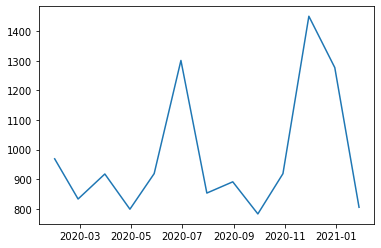

In [5]:
files = [csvfiles['movements_01-2020'][['Data lanc','Credito']],csvfiles['movements_02-2020'][['Data lanc','Credito']],csvfiles['movements_03-2020'][['Data lanc','Credito']],
csvfiles['movements_04-2020'][['Data lanc','Credito']],csvfiles['movements_05-2020'][['Data lanc','Credito']],csvfiles['movements_06-2020'][['Data lanc','Credito']],csvfiles['movements_07-2020'][['Data lanc','Credito']],csvfiles['movements_08-2020'][['Data lanc','Credito']],csvfiles['movements_09-2020'][['Data lanc','Credito']],    
csvfiles['movements_10-2020'][['Data lanc','Credito']],csvfiles['movements_11-2020'][['Data lanc','Credito']],csvfiles['movements_12-2020'][['Data lanc','Credito']],csvfiles['movements_01-2021'][['Data lanc','Credito']],csvfiles['movements_02-2021'][['Data lanc','Credito']]]
salarydf = pd.concat(files,ignore_index=True)
salarydf = salarydf.loc[(salarydf['Credito'] > 200)&(salarydf['Credito'] != 650.00)]

plt.plot(salarydf['Data lanc'],salarydf['Credito'])
salarydf

In [6]:
"""Hypotesis: H0: mean_salary <=  900eur,             H1: mean_salary  > 900eur"""
"""
confidence = 0.95,   significance = 0.05"""
Pvalues = []
#Sample
randkey = random.sample(list(csvfiles.keys()),k=8)
raw_sample = []
for key in randkey:
    raw_sample.append(csvfiles[key]['Credito'])
raw_sample = pd.concat(raw_sample, ignore_index=True)
salary_sample = raw_sample[raw_sample > 200]
salary_sample.drop(index=salary_sample[salary_sample==650.00].index,inplace=True)

#Compute stat
mean_sample= salary_sample.mean()
std_sample= salary_sample.std(ddof=1)
stat = (mean_sample-900)/(std_sample/np.sqrt(len(salary_sample)))
display(salary_sample)
print('mean =',mean_sample,'  ','std=',std_sample)
print('statistic=',stat)
st.t.sf(abs(stat),len(salary_sample)-1)

38      968.81
53      798.43
88     1301.52
110     918.80
132     804.87
155     917.47
190     832.90
222    1451.10
Name: Credito, dtype: float64

mean = 999.2375    std= 243.60592238578388
statistic= 1.1522135178121595


0.1435299110404731

,Credito
38,968.81
53,798.43
88,1301.52
110,918.80
132,804.87
155,917.47
190,832.90
222,1451.10


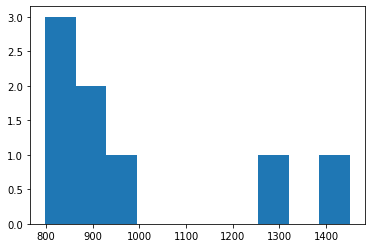

In [7]:
plt.hist(salary_sample)
pd.DataFrame(salary_sample)

In [8]:
#salary_sample.to_csv(r'C:\Users\Sebas!\Documents\GitHub\Project4\Datasets\Cleaned datasets\SalarySample.csv')

In [9]:
"""DECITION ON HYPOTESIS:
We see that our p-value > significance level, this means we should not reject H0, my mean
salary is <= 900 euros monthly
"""
salarydf

,Data lanc,Credito
38,2020-01-31,968.81
71,2020-02-28,832.90
93,2020-03-31,917.47
110,2020-04-30,798.43
132,2020-05-29,918.80
167,2020-06-30,1301.52
217,2020-07-31,852.99
246,2020-08-31,891.01
286,2020-09-30,782.44
302,2020-10-30,918.60


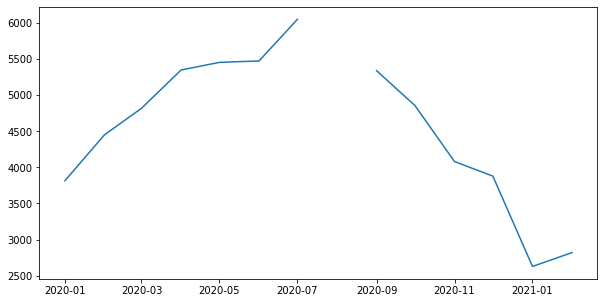

,0
2020-01-01,3813.754359
2020-02-01,4450.793714
2020-03-01,4819.111818
2020-04-01,5350.091333
2020-05-01,5455.994545
2020-06-01,5475.750571
2020-07-01,6052.289000
2020-08-01,5696.426000
2020-09-01,5340.563000
2020-10-01,4857.351765


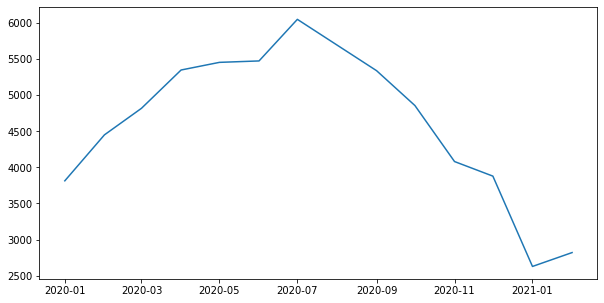

In [10]:
"""TIME SERIES"""
#get mean salary
meansavings =[]
for key in csvfiles.keys():
    meansavings.append(csvfiles[key]['Saldo'].mean())

#preparing the month 
months = []
for month in range(1,13):
    months.append(f'{month}/2020')
    if month >=12:
        for month in range(1,3):
            months.append(f'{month}/2021')

#creating dataframe
dfsavings = pd.DataFrame(data= meansavings, index=months)
dfsavings.index = pd.to_datetime(dfsavings.index,format = '%m/%Y')
dfsavings[0]['2020-08-01'] = np.nan #The dataframe csvfile['movements_08-2020'] does not have alll the days of that month


#before interpolation
plt.figure(figsize=(10,5))
plt.plot(dfsavings.index,dfsavings[0])
plt.show()
#plt.savefig(fr'{datavizfolder}\Before_interpolation_savings.png')

#after interpolation
dfsavings[0] = dfsavings[0].interpolate()
plt.figure(figsize=(10,5))
plt.plot(dfsavings.index,dfsavings[0])
#plt.savefig(fr'{datavizfolder}\After_interpolation_savings.png')
sm.tsa.seasonal_decompose
dfsavings
#dfsavings.to_csv(fr'{path}\meansavings.csv')

c:\users\sebas!\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPREC

2020-06-01    5347.079680
2020-07-01    5365.914446
2020-08-01    5915.567800
2020-09-01    5576.299363
2020-10-01    5237.030926
2020-11-01    4776.352742
2020-12-01    4036.075973
2021-01-01    3843.486138
2021-02-01    2649.591200
2021-03-01    2832.981185
2021-04-01    2846.382381
2021-05-01    2859.158653
Freq: MS, dtype: float64

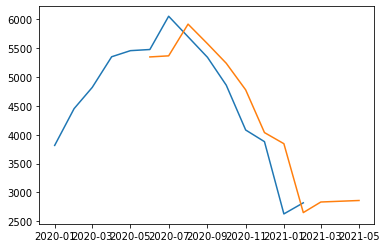

In [35]:
#AR Model
train , test = dfsavings[0],dfsavings[-1:]
model = AR(train)
model_fit = model.fit(maxlag=1)
prediction = model_fit.predict(start =5,end=len(train)+len(test)+1,dynamic=False)
plt.plot(dfsavings)
plt.plot(prediction)
prediction

,Prediction
2020-06-01,5321.040629
2020-07-01,5304.366829
2020-08-01,6025.392171
2020-09-01,5348.823014
2020-10-01,5038.926791
2020-11-01,4568.051364
2020-12-01,3776.532043
2021-01-01,3826.532061
2021-02-01,2322.968621
2021-03-01,3058.600305


,0
2020-01-01,3813.754359
2020-02-01,4450.793714
2020-03-01,4819.111818
2020-04-01,5350.091333
2020-05-01,5455.994545
2020-06-01,5475.750571
2020-07-01,6052.289000
2020-08-01,5696.426000
2020-09-01,5340.563000
2020-10-01,4857.351765


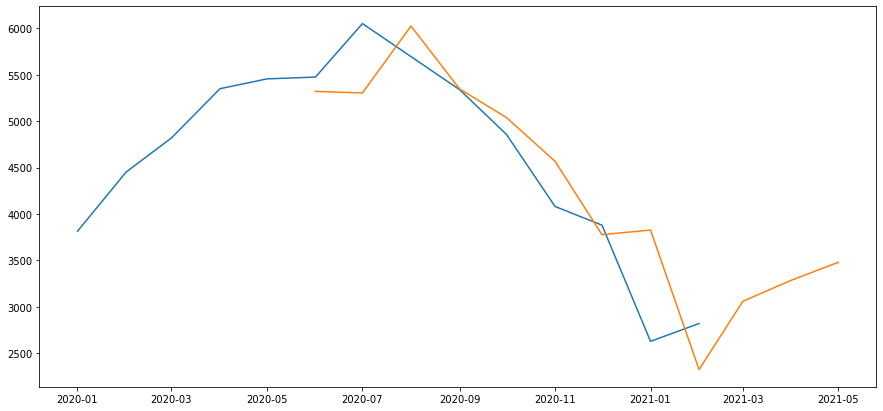

In [12]:
plt.figure(figsize=[15,7])
plt.plot(dfsavings)
plt.plot(prediction)
predict = pd.DataFrame(prediction,columns=['Prediction'])
display(predict)
dfsavings
#plt.savefig(fr'{datavizfolder}\ARmodel.png')
#predict.to_csv(r'C:\Users\Sebas!\Documents\GitHub\Project4\Datasets\Cleaned datasets\Prediction.csv')

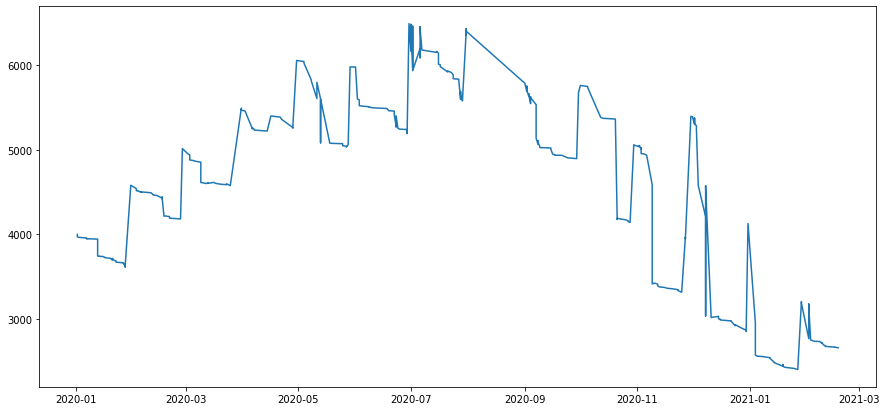

In [13]:
files2 = [csvfiles['movements_01-2020'],csvfiles['movements_02-2020'],csvfiles['movements_03-2020'],
csvfiles['movements_04-2020'],csvfiles['movements_05-2020'],csvfiles['movements_06-2020'],csvfiles['movements_07-2020'],csvfiles['movements_09-2020'],    
csvfiles['movements_10-2020'],csvfiles['movements_11-2020'],csvfiles['movements_12-2020'],csvfiles['movements_01-2021'],csvfiles['movements_02-2021']]
files2 = pd.concat(files2, ignore_index=True)
files2.drop(columns ='Unnamed: 0',inplace=True)
files2.sort_values(by=['Data lanc'],inplace=True)
plt.figure(figsize=[15,7])
plt.plot(files2['Data lanc'],files2['Saldo'])
#plt.savefig(fr'{datavizfolder}\SeasonalityTimeseries.png')

In [34]:
files2

,Data lanc,Data valor,Descritivo,Debito,Credito,Saldo
0,2020-01-02,2020-01-02,COMPRA MOSCAVIDE LISBOA,40.00,NaN,3999.70
1,2020-01-02,2020-01-02,COMPRA ZHOU E PAN LDA LISBOA,16.00,NaN,3983.70
2,2020-01-02,2020-01-02,DEVOL. ZHOU E PAN LDA LISBOA,NaN,16.0,3999.70
3,2020-01-02,2020-01-02,COMPRA ZHOU E PAN LDA LISBOA,16.00,NaN,3983.70
4,2020-01-02,2020-01-02,COMPRA PAD PORT TELHEIR LIS CONTACTLESS,3.05,NaN,3980.65
...,...,...,...,...,...,...
388,2021-02-11,2021-02-11,COMPRA FOOD.BOLT.EU C Viimsi EE,10.00,NaN,2680.45
389,2021-02-11,2021-02-11,COMPRA FOOD.BOLT.EU C Viimsi EE,7.68,NaN,2672.77
391,2021-02-16,2021-02-16,COMPRA UBER EATS HELP.UBER.COMPT,0.40,NaN,2664.37
390,2021-02-16,2021-02-16,COMPRA UBER EATS PENDING Amsterdam PT,8.00,NaN,2664.77


In [14]:
#files2 doesn't have the csvfiles['movements_08-2020'] while files3 it has
files3 = [csvfiles['movements_01-2020'],csvfiles['movements_02-2020'],csvfiles['movements_03-2020'],
csvfiles['movements_04-2020'],csvfiles['movements_05-2020'],csvfiles['movements_06-2020'],csvfiles['movements_07-2020'],csvfiles['movements_08-2020'],csvfiles['movements_09-2020'],    
csvfiles['movements_10-2020'],csvfiles['movements_11-2020'],csvfiles['movements_12-2020'],csvfiles['movements_01-2021'],csvfiles['movements_02-2021']]
files3 = pd.concat(files3, ignore_index=True)
files3.drop(columns ='Unnamed: 0',inplace=True)
files3.sort_values(by=['Data lanc'],inplace=True)
#files3.to_csv(r'C:\Users\Sebas!\Documents\GitHub\Project4\Datasets\Cleaned datasets\fulldatacleanded.csv')

In [23]:
"""Probability

What is the probability to get a salary over 1000 eur?"""

cathegory = ['one thousand'if n >= 1000 else 'lower one thousand' for n in salarydf['Credito']]
dfprobability = salarydf
dfprobability.insert(2,'category',cathegory)
dfprobability = dfprobability.groupby(by=['category'])
counter = dfprobability['category'].count()
probabilityresult = counter[1]/len(cathegory)

In [28]:
probabilityresult

0.23076923076923078

In [29]:
counter

category
lower one thousand    10
one thousand           3
Name: category, dtype: int64